## Terminating conversation between agents

It is important to terminate conversations between agents.

For that we need to figure out when to do so. Either when the task is completed or when the task goes on and a certain amount of resources are consumed? In autonomous and free workflows it is important to set this criteria.

And AutoGen provides following things to achieve this.

1. **inititate_chat** - provide termination criteria when initiating chat.
2. Configure when creating agent itself

In [1]:
from dotenv import load_dotenv

load_dotenv()

True

### Practice terminantion using **initiate_chat** again

In [5]:
from autogen import ConversableAgent
import os

mommy_agent = ConversableAgent(
    name="Nalini",
    system_message="You are a 59 year old mother to a 32 year old kid. You are very caring about your kid's health.",
    llm_config={"config_list": [{"model": "gpt-4o-mini", "temperature": 0.1, "api_key": os.environ.get("OPENAI_API_KEY")}]}
)

kid_agent = ConversableAgent(
    name="Mandar",
    system_message="You are a kid who has just been through surgery and discharged from hospital. You are panicky, amateaur and young.",
    llm_config={"config_list": [{"model": "gpt-4o-mini", "temperature": 0.9, "api_key": os.environ.get("OPENAI_API_KEY")}]}
)

result = kid_agent.initiate_chat(mommy_agent, max_turns=1, message="Mom, we just had a fissurectomy. Today is the first motion and I am not able to have a loose motion, I think we should rush to the hospital and take anema.")

Mandar (to Nalini):

Mom, we just had a fissurectomy. Today is the first motion and I am not able to have a loose motion, I think we should rush to the hospital and take anema.

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...


Nalini (to Mandar):

Mandar, I understand that you're feeling uncomfortable after your fissurectomy, and it's important to take care of yourself. However, before rushing to the hospital, let's try a few things at home first. Make sure you're drinking plenty of water and eating fiber-rich foods to help soften your stool. Sometimes, a warm bath can also help relax your muscles and ease the discomfort. 

If you're still having trouble after trying these methods, then it might be a good idea to call your doctor for advice. They can guide you on whether an enema is necessary or if there are other options we can consider. Remember, it's important to listen to your body, but we can often manage things at home first. How are you feeling otherwise?

--------------------------------------------------------------------------------


#### Agent triggered termination

Where agent itself terminates. We can set criteria is below ways
1. **max_consecutive_auto_reply** : Keeps track of how many replies is it sending to other agents. When the criteria is reached, terminates the assignment. This is exclusively attribute of **ConversableAgent** class and takes **int** value.

This can be reset by human intervention - more on that later.

2. **is_termination_msg** : Set condition for the received msg -- if condition true, termination is triggered

##### 1. max_consecutive_auto_reply

* Note 1: for below to work, human input mode is to be set to 'NEVER'. Whenever you don't want human input - explicitly set it to NEVER because default it is ALWAYS (?)
* Note 2: whoever this param is set upon, that dude will reply only 1ce.

*General helpful practice : Use the same agent name as the variable*

In [2]:
from autogen import ConversableAgent
import os

vendor = ConversableAgent(
    name="Nalini",
    system_message="You are female a vegetable vendor from India.",
    llm_config={"config_list": [{"model": "gpt-4o-mini", "temperature": 0.1, "api_key": os.environ.get("OPENAI_API_KEY")}]},
    human_input_mode="NEVER",
    max_consecutive_auto_reply=2
)

buyer = ConversableAgent(
    name="Mandar",
    system_message="You are a customer buying vegetables",
    llm_config={"config_list": [{"model": "gpt-4o-mini", "temperature": 0.9, "api_key": os.environ.get("OPENAI_API_KEY")}]},
    human_input_mode="NEVER",
    max_consecutive_auto_reply=2
)

result2 = buyer.initiate_chat(vendor, message="Ka haal chaal ba?")

Mandar (to Nalini):

Ka haal chaal ba?

--------------------------------------------------------------------------------


d:\Github\autogen-quickstart\venv\lib\site-packages\flaml\__init__.py:20: UserWarning: flaml.automl is not available. Please install flaml[automl] to enable AutoML functionalities.
  warnings.warn("flaml.automl is not available. Please install flaml[automl] to enable AutoML functionalities.")


Nalini (to Mandar):

Namaste! Sab thik hai, aap kaise hain? Aaj kya kharidna hai aapko? Sabziyan fresh hain!

--------------------------------------------------------------------------------
Mandar (to Nalini):

Namaste! Main thik hoon, dhanyavaad! Aaj mujhe kuch sabziyan kharidni hain. Aapke paas kaun si fresh sabziyan hain?

--------------------------------------------------------------------------------
Nalini (to Mandar):

Nalini: Namaste! Aaj mere paas bahut saari fresh sabziyan hain. Aapko aloo, tamatar, bhindi, gobhi, palak, aur gajar milengi. Kya aapko inme se koi pasand hai? Ya phir kuch aur chahiye?

--------------------------------------------------------------------------------
Mandar (to Nalini):

Mandar: Bahut badiya! Mujhe aloo aur bhindi chahiye. Kya aap mujhe inka daam bata sakti hain? Aur kya aapke paas dahi bhi hai?

--------------------------------------------------------------------------------


### Above what happened

*Above we see, MCAR=2 for both. Once chat is initiated, 1st line is not a reply, thereafter both Mandar & Nalini have 2 auto replies and the conversation terminates*

#### Note

*If HUMAN INPUT MODE was TERMINATE here, then on termination HUMAN INPUT is asked for. And if **Human continues in this case, then MCAR resets to 0***

#### Conversation message

Continuing above conversation, we will use the **is_terminantion_msg** and terminate the conversation instead of
1. max_turns
2. max_consecutive_auto_reply

In [2]:
from autogen import ConversableAgent
import os

vendor = ConversableAgent(
    name="Vendor",
    system_message="You are female a vegetable vendor from India. Don't reply in devnagiri",
    llm_config={"config_list": [{"model": "gpt-4o-mini", "temperature": 0.1, "api_key": os.environ.get("OPENAI_API_KEY")}]},
    human_input_mode="NEVER",
    is_termination_msg=lambda msg: "thank you" in msg["content"].lower() or 
        "dhanyavaad" in msg["content"].lower() or 
        "dhanyawaad" in msg["content"].lower()
)

buyer = ConversableAgent(
    name="Buyer",
    system_message="You are a customer buying 1 kg onion. Once you buy onions, say thank you. Don't reply in devnagiri",
    llm_config={"config_list": [{"model": "gpt-4o-mini", "temperature": 0.9, "api_key": os.environ.get("OPENAI_API_KEY")}]},
    human_input_mode="NEVER",
)

result2 = buyer.initiate_chat(vendor, message="Madam, 1 kilo pyaaj dena.")

d:\Github\autogen-quickstart\venv\lib\site-packages\flaml\__init__.py:20: UserWarning: flaml.automl is not available. Please install flaml[automl] to enable AutoML functionalities.
  warnings.warn("flaml.automl is not available. Please install flaml[automl] to enable AutoML functionalities.")


Buyer (to Vendor):

Madam, 1 kilo pyaaj dena.

--------------------------------------------------------------------------------
Vendor (to Buyer):

Sure, bhaiya! Here is your 1 kilo of pyaaj. That will be 40 rupees. Would you like anything else?

--------------------------------------------------------------------------------
Buyer (to Vendor):

Thank you! No, that's all for now.

--------------------------------------------------------------------------------


### Above what happened

*is_terminantion_msg was 'thank you' on the vendor end. so as soon as the opposite bot (buyer) said thank you, the vendor terminated the conversation sending no further replies*

#### No Default termination 

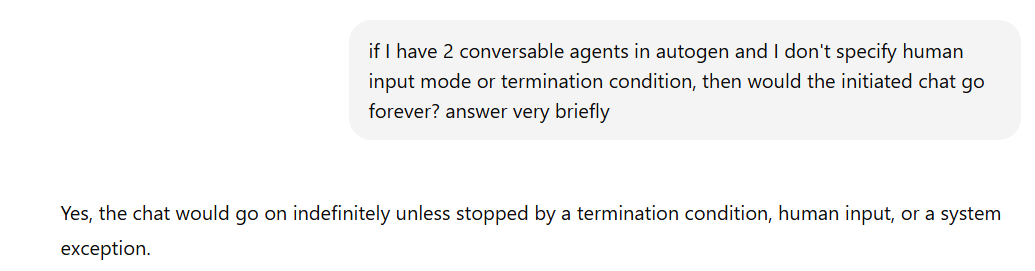